In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive

# 1 - MSE
## Estimator
An **estimator** $\hat{\lambda}$  is a function of the data that is used to infer the value of an unknown parameter of the model.

Lets say we have a set of data $\lbrace X_1, ... , X_n\rbrace$, and we want to estimate its mean $\mathbb{E}[X]$ and variance $Var[X]$. 

- A natural estimator of the mean would be the **empirical mean**

    $$\hat{m} = \frac{1}{n} \sum_{i=1}^{n} X_i$$

    This estimator is said to be **unbiased** because it follows

    $$\mathbb{E}[\hat{m}] = \frac{1}{n} \sum_{i=1}^{n} \mathbb{E}[X_i] = \mathbb{E}[X] $$
    
    The variance of this estimator, i.e. the error on the estimation is 
    
    $$Var[\hat{m}] = \frac{\mathbb{E}[X^2] - \hat{m}^2}{n} = \frac{\Delta}{n}$$
    
    so that
    
    $$\hat{m} = m \pm \sqrt{\frac{\Delta}{n}}$$

- Now, what about the estimator of the variance of the data, $Var[X]$ ?
    * We may try the estimator
        $$\hat{\Delta} = \frac{1}{n}\sum_{i=1}^{n} (X_i - \hat{m})^2 $$
        but it is biased ($\mathbb{E}[\hat{\Delta}] \neq Var[X]$)
    * However, this is is unbiased
        $$\hat{\Delta} = \frac{1}{n-1}\sum_{i=1}^{n} (X_i - \hat{m})^2 $$

## Mean Square Error (MSE)

The **Mean Square Error** (MSE) of an estimator $\hat{\lambda}$ is defined by
$$\rm{MSE}(\hat{\lambda}) = \mathbb{E}[(\hat{\lambda} - \lambda)^2] $$
It quantifies the "precision" of the estimator. The smaller the MSE, the closer to the true value of the parameter the estimator.

## Bias

The fact that an estimator is biased can be quantified using the **bias function**, defined as 
$$ b(\hat{\lambda}; \lambda) = \mathbb{E}[\hat{\lambda} - \lambda] = \mathbb{E}[\hat{\lambda}] - \lambda$$
It corresponds to the difference between the estimator and the true value of the parameter.

The bias is linked to the MSE via the relation
$$\rm{MSE}(\hat{\lambda}) = Var[\hat{\lambda}] + b^{2}(\hat{\lambda};\lambda) $$

Remarks :
- An unbiased estimator is not always the best. It is a tradeoff between the MSE and the bias, i.e. the error from fluctuations of the data set and the error due to assumptions of the model.


## Example

In [2]:
N = 1000
data = np.random.normal(0, 1, size=N)

def mean_estimator(data) :
    return np.sum(data)/N

def var_estimator_unbiased(data) :
    m = mean_estimator(data)
    return np.sum((data-m)**2)/(N-1.)

def var_estimator_biased(data) :
    m = mean_estimator(data)
    return np.sum((data-m)**2)/(N-1.)

def MSE(estimator, true_value) :
    return np.mean((estimator- true_value)**2)

def bias(estimator, true_value) :
    return np.mean(estimator-true_value)

mu = mean_estimator(data)
M_mu = MSE(mu, 0.)

sig = var_estimator_unbiased(data)
M_sig = MSE(sig, 0.)

b_mu = bias(mu, 0.)
b_sig = bias(sig, 1.)

print 'True value\tEstimator\tMSE\tBias\n==============================================='
print str(0) + '\t' + str(mu) + '\t' + str(M_mu) + '\t' + str(b_mu)
print str(1) + '\t' + str(sig) + '\t' + str(M_sig) + '\t' + str(b_sig)

True value	Estimator	MSE	Bias
0	-0.01213696444210528	0.0001473059058689279	-0.01213696444210528
1	1.0226297619132128	1.0457716299506743	0.022629761913212754


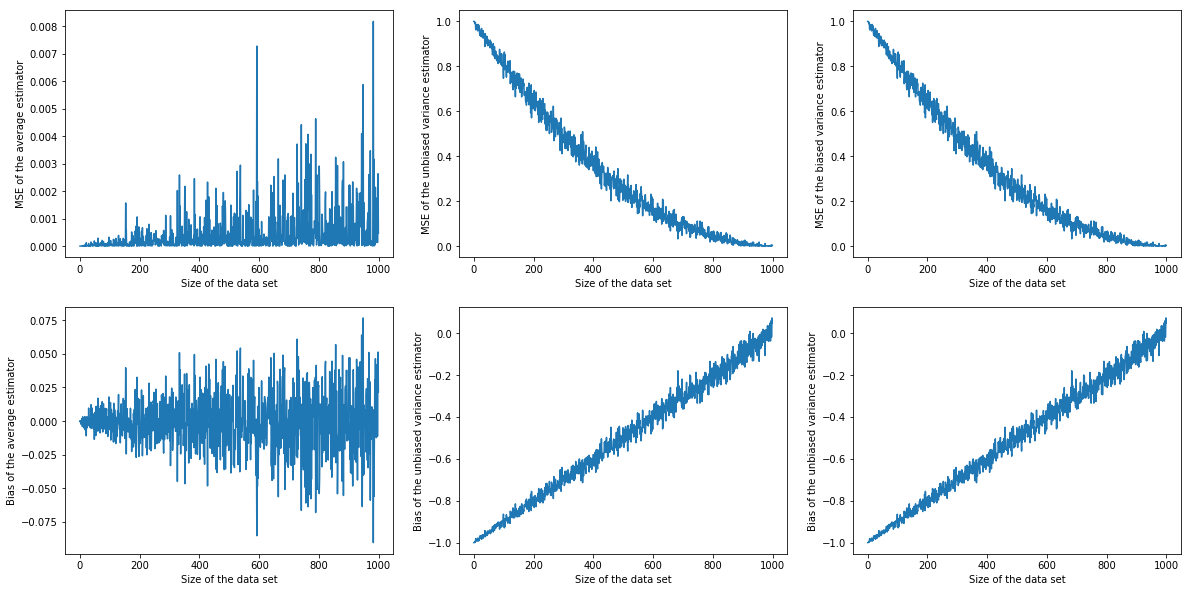

In [3]:
def MSE_N(Nmax) :
    mu_array = np.zeros(Nmax)
    var1_array = np.zeros(Nmax)
    var2_array = np.zeros(Nmax)
    
    MSE_mu_array = np.zeros(Nmax)
    MSE_var1_array = np.zeros(Nmax)
    MSE_var2_array = np.zeros(Nmax)
    
    bias_mu_array = np.zeros(Nmax)
    bias_var1_array = np.zeros(Nmax)
    bias_var2_array = np.zeros(Nmax)
    
    for n in range(0, Nmax) :
        data = np.random.normal(0, 1, size=n)
        mu, var1, var2 = mean_estimator(data), var_estimator_unbiased(data), var_estimator_biased(data)
        
        mu_array[n] = mu
        var1_array[n] = var1
        var2_array[n] = var2
        
        MSE_mu_array[n] = MSE(mu, 0.)
        MSE_var1_array[n] = MSE(var1, 1.)
        MSE_var2_array[n] = MSE(var2, 1.)
        
        bias_mu_array[n] = bias(mu, 0.)
        bias_var1_array[n] = bias(var1, 1.)
        bias_var2_array[n] = bias(var2, 1.)
        
    return mu_array, var1_array, var2_array, MSE_mu_array, MSE_var1_array, MSE_var1_array, bias_mu_array, bias_var1_array, bias_var2_array

mu, var1, var2, MSE_mu, MSE_var1, MSE_var2, bias_mu, bias_var1, bias_var2 = MSE_N(1000)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(MSE_mu)
ax[0, 0].set_xlabel('Size of the data set')
ax[0, 0].set_ylabel('MSE of the average estimator')
ax[0, 1].plot(MSE_var1)
ax[0, 1].set_xlabel('Size of the data set')
ax[0, 1].set_ylabel('MSE of the unbiased variance estimator')
ax[0, 2].plot(MSE_var2)
ax[0, 2].set_xlabel('Size of the data set')
ax[0, 2].set_ylabel('MSE of the biased variance estimator')

ax[1, 0].plot(bias_mu)
ax[1, 0].set_xlabel('Size of the data set')
ax[1, 0].set_ylabel('Bias of the average estimator')
ax[1, 1].plot(bias_var1)
ax[1, 1].set_xlabel('Size of the data set')
ax[1, 1].set_ylabel('Bias of the unbiased variance estimator')
ax[1, 2].plot(bias_var2)
ax[1, 2].set_xlabel('Size of the data set')
ax[1, 2].set_ylabel('Bias of the unbiased variance estimator')
plt.show()

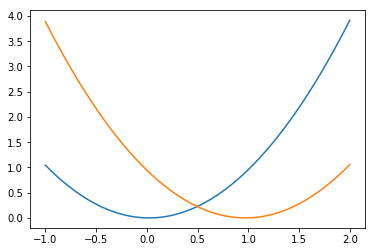

In [11]:
def MSE_lam(lam_min, lam_max, n, size=1000) :
    l = np.linspace(lam_min, lam_max, n+1)
    mean = np.zeros(n+1)
    var = np.zeros(n+1)
    data = np.random.normal(0., 1., size=size)
    for i in range(n+1) :
        mean[i] = MSE(estimator=l[i], true_value=mean_estimator(data))
        var[i] = MSE(estimator=l[i], true_value=var_estimator_unbiased(data))
    return l, mean, var

l, mean, var = MSE_lam(-1., 2., 10000)
plt.plot(l, mean)
plt.plot(l, var)
print ''

# 2 - MLE
## Likelihood

Let be $X$ a discrete random variable with p.d.f. $p$ depending on a parameter $\theta$.
Then 
$$ \mathcal{L}(\theta | x) = p_{\theta}(x) = P_{\theta}(X=x)$$

i.e. : given the outcome $x$ of the rd variable $X$, the likelihood is the probability that the parameter has the value $\theta$.

Often, the likelihood is preferred to its logarithm, the so called log-Likelihood :
$$\mathbb{L}(\theta) = \log \mathcal{L}(\theta)$$

**N.B.** for a set of $n$ random variables $X_1, ..., X_n$, the likelihood is the joint p.d.f. of the rd variables, i.e.
$$\mathcal{L}(\theta | \lbrace \rbrace) = \prod_{i} P_{\theta}(X_i=x_i)$$

### Example
Let be a Bernoulli process, for instance coin tossing. We do not assume any value of the probability $p_{H}$ to get a head. If the coin is fair, then $p_{H} = 0.5$.
The likelihood is the function that associates weights to the different values of $p_{H}$ given the observations $x$ of the rd variable $X$.

- Case 1 : let the coin be fair ($p_{H} = 0.5$ ). We flip the coin twice, and we get two heads, i.e. {X=HH}. The probability to observe such an event for i.i.d rv  is : 
$$P(\lbrace HH \rbrace | p_{H}=0.5) = 0.5^2 = 0.25$$
What is the likelihood that given the observation {HH}, $p_{H}=0.5$ ?
$$\mathcal{L}(p_{H}=0.5 | {HH}) = p_H^2 = 0.25 $$
i.e. it is in a way more probable that the coin is not fair.
- Case 2 : let the coin be unfair, with $p_H=0.3$. Then for the same event, we have
$$P(\lbrace HH \rbrace | p_{H}=0.3) = 0.3^2 = 0.09$$
and
$$\mathcal{L}(p_{H}=0.3 | \lbrace HH \rbrace) = p_H^2 = 0.09$$
- Case 3 : unfair coin and different event, we observe {HHTH}. The likelihood is then
$$\mathcal{L}(p_{H}=0.3 | \lbrace HHTH \rbrace) = p_H^3 (1-p_H) = 0.0189$$

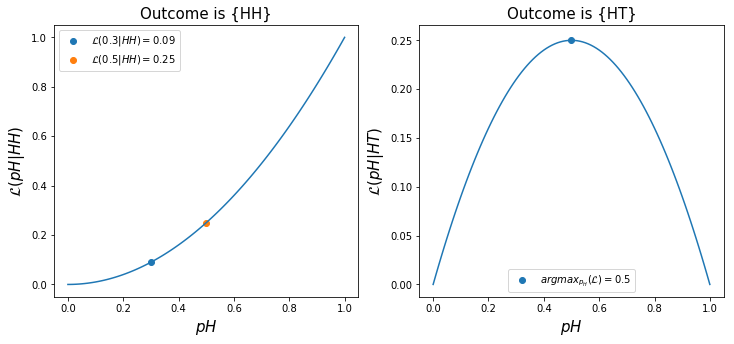

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# HH
pH = np.linspace(0, 1, 101)
likelihood = pH*pH
ax[0].plot(pH, likelihood)
ax[0].scatter(0.3, 0.3*0.3, label = '$\mathcal{L}(0.3 |HH) = '+str(0.3*0.3)+'$')
ax[0].scatter(0.5, 0.5*0.5, label = '$\mathcal{L}(0.5 |HH) = '+str(0.5*0.5)+'$')
ax[0].set_title('Outcome is {HH}', fontsize=15)
ax[0].set_xlabel('$pH$', fontsize=15)
ax[0].set_ylabel('$\mathcal{L}(pH | HH)$', fontsize=15)
ax[0].legend(fontsize=10)

# HT
pH = np.linspace(0, 1, 101)
likelihood = pH*(1-pH)
ax[1].plot(pH, likelihood)
ax[1].scatter(pH[np.argmax(likelihood)], np.max(likelihood), label = '$argmax_{p_H} (\mathcal{L}) = $' + str(pH[np.argmax(likelihood)]))
ax[1].set_title('Outcome is {HT}', fontsize=15)
ax[1].set_xlabel('$pH$', fontsize=15)
ax[1].set_ylabel('$\mathcal{L}(pH | HT)$', fontsize=15)
ax[1].legend(fontsize=10)

plt.show()

We can make some comments on the above graphs:
* Left : if the outcome is {HH}, then the most plausible value for $p_H$ is the one where $p_H = 1$, since we will for sure get the outcome {HH}
* Right : now if the outcome is {HT}, the likelihood becomes symmetric with a maximum value in $p_H=0.5$. Indeed, the most plausible value for $p_H$ is the fair case, because there is an equal number of heads and tails.

In [14]:
def f(n, m):    
    plt.figure(figsize=(5, 5))
    pH = np.linspace(0, 1, 101)
    likelihood = pH**n * (1-pH)**m
    argmax_pH = pH[np.argmax(likelihood)]
    max_L = np.max(likelihood)
    plt.scatter(argmax_pH, max_L, label = '$argmax_{p_H} (\mathcal{L}) = $' + '% 6.2f' % argmax_pH)
    plt.plot(pH, likelihood)
    plt.legend(fontsize=15)
    plt.ylim(0, np.max(likelihood)*1.2)
    plt.xlim(0, 1)
    plt.title('Outcome is {$H^n T^m$}', fontsize=15)
    plt.xlabel('p(H)', fontsize=15)
    plt.ylabel('$\mathcal{L}(pH | HHTH)$', fontsize=15)
    plt.show()

# H^N T^M

interactive_plot = interactive(f, m=(0, 10), n=(0, 10))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description=u'n', max=10), IntSlider(value=5, description=u'm', max=10), Output(layout=Layout(height=u'350px'))), _dom_classes=('widget-interact',))

Some remarks :
- There is always only one maximum of the likelihood.
- For 1 observation (Head or Tail) , the likelihood is a straight line.
- For the same number of H and T, the maximum of the likelihood is at $p_H = 0.5$
- With asymmetric number of H ($n_H$) and T ($n_T$), the likelihood has its maximum that shift towards 1 (resp. 0) if $n_H > n_T$ (resp. $n_H < n_T$)

# Maximum Likelihood Estimator (MLE)

Lets assume that we have a process described by a family of distributions $\lbrace p_{\lambda}(x)\rbrace$, parametrized by $\lambda$, and a set of i.i.d. observations $\lbrace x_{i} \rbrace_{i=1}^{N}$.

We want to compute an estimation of the parameter $\lambda$, i.e. an **estimator**, such that it corresponds to the most plausible value.
As shown above, this corresponds to find the value for which the likelihood is maximal.

This is done using the **Maximum Likelihood Estimator** (MLE).

## Definition

The MLE of a parameter $\lambda$ for the pdf $p$ is defined as
$$\lambda_{\rm{MLE}} = \rm{argmax}_{\lambda}[ p(\lbrace x_{i} \rbrace_{i=1}^{N} | \lambda)] = \rm{argmax}_{\lambda} [\prod_{i} p(x_i|\lambda)]$$
or using the log-likelihood (and its monotony), we have
$$\lambda_{\rm{MLE}} = \rm{argmax}_{\lambda} \mathbb{L}(x_i|\lambda)$$

## Example
### Bernoulli Law
Let $X_1, ..., X_n$ be i.i.d. distributed according to a Bernoulli law of parameter $\theta$, such that
$$P(X=x) = \theta^{x}(1-\theta)^{1-x}$$

Its likelihood is given by
$$\mathcal{L}(\theta) = \prod_i \theta^{x_i} (1-\theta)^{1-x_i} = \theta^{n \hat{m}} (1-\theta)^{n(1-\hat{m} )}$$
$$\mathbb{L}(\theta) = n\hat{m}\log \theta + n\hat{m}\log(1-\theta)$$
where $\hat{m}$ is the empirical mean. Derivation of $\mathbb{L}$ with respect to $\theta$ and then equating to 0 gives that the Maximum Likelihood Estimator for $\theta$ is:
$$\theta_{\rm{MLE}} = \hat{m}$$
corresponding to what we found above.

### Poisson Law
Let $X_1, ..., X_n$ be i.i.d. distributed according to a Poisson law of parameter $\theta$, such that
$$P(X=x) = \frac{\theta^{x}}{x !}e^{-\theta}$$

Its likelihood is given by 
$$\mathcal{L}(\theta) = \prod_{i} \frac{\theta^{x_i}}{x_i !} e^{-\theta} = e^{-n\theta} \theta^{n\hat{m}}\prod_i \frac{1}{x_i !} $$
the log-likelihood by
$$\mathbb{L}(\theta) = -n\theta + n\hat{m} \theta - \sum_i \log{x_i !} $$
and the MLE by
$$\theta_{\rm{MLE}} = \hat{m}$$

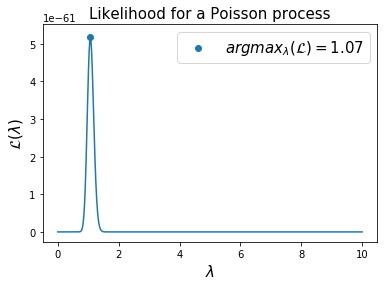

In [62]:
from scipy.special import factorial
N=100
data = np.random.poisson(lam=1, size=N)
lambda_estimator = np.mean(data)

n = 1000
theta = np.linspace(0, 10, n+1)

def li(data) :
    likelihood = 1.
    for i in range(len(data)) :
        ldat = (theta**data[i])/(factorial(data[i]))*np.exp(-theta)
        likelihood *= ldat
    return likelihood

likelihood = li(data)

max_likelihood = np.max(likelihood)
lam_MLE = theta[np.argmax(likelihood)]

plt.plot(theta, likelihood)
plt.scatter(lam_MLE, max_likelihood, label='$argmax_{ \lambda}(\mathcal{L})=$'+str(lam_MLE))

plt.title('Likelihood for a Poisson process', fontsize=15)
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$\mathcal{L}(\lambda)$', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
def f_poisson(n_data, lam):    
    plt.figure(figsize=(5, 5))
    pH = np.linspace(0, 1, 101)
    likelihood = pH**n * (1-pH)**m
    argmax_pH = pH[np.argmax(likelihood)]
    max_L = np.max(likelihood)
    plt.scatter(argmax_pH, max_L, label = '$argmax_{p_H} (\mathcal{L}) = $' + '% 6.2f' % argmax_pH)
    plt.plot(pH, likelihood)
    plt.legend(fontsize=15)
    plt.ylim(0, np.max(likelihood)*1.2)
    plt.xlim(0, 1)
    plt.title('Outcome is {$H^n T^m$}', fontsize=15)
    plt.xlabel('p(H)', fontsize=15)
    plt.ylabel('$\mathcal{L}(pH | HHTH)$', fontsize=15)
    plt.show()

# H^N T^M

interactive_plot = interactive(f, m=(0, 10), n=(0, 10))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

# Fisher Information

In [ ]:
np.prod